# World Population
* Download the data files
  * The data is available here: https://population.un.org/wpp/Download/Standard/CSV/
  * The data columns are also explained on the same page
* Join them in one dataset (DataFrame)
* Peform a regresion on the data
* Predict life expectancy: LEx

### Download data

In [3]:
%sh
rm /databricks/driver/WPP2019*.csv*

In [4]:
%sh
wget 'https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv'
wget 'https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_Period_Indicators_Medium.csv'

--2019-10-29 03:40:07-- https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv
Resolving population.un.org (population.un.org)... 157.150.185.69
Connecting to population.un.org (population.un.org)|157.150.185.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20331243 (19M) [application/octet-stream]
Saving to: ‘WPP2019_TotalPopulationBySex.csv’

 0K .......... .......... .......... .......... .......... 0% 124K 2m39s
 50K .......... .......... .......... .......... .......... 0% 236K 2m1s
 100K .......... .......... .......... .......... .......... 0% 248K 1m47s
 150K .......... .......... .......... .......... .......... 1% 480K 90s
 200K .......... .......... .......... .......... .......... 1% 249K 88s
 250K .......... .......... .......... .......... .......... 1% 480K 80s
 300K .......... .......... .......... .......... .......... 1% 248K 80s
 350K .......... .......... .......... .......... .......... 2% 479K 74s
 400K .......... .......... .......... .......... .......... 2% 246K 75s
 450K .......... .......... .......... .......... .......... 2% 209K 76s
 500K .......... .......... .......... .......... .......... 2% 476K 73s
 550K .......... .......... .......... .......... .......... 3% 250K 73s
 600K .......... .......... .......... .......... .......... 3% 472K 70s
 650K .......... .......... .......... .......... .......... 3% 246K 71s
 700K .......... .......... .......... .......... .......... 3% 251K 71s
 750K .......... .......... .......... .......... .......... 4% 468K 69s
 800K .......... .......... .......... .......... .......... 4% 252K 69s
 850K .......... .......... .......... .......... .......... 4% 467K 67s
 900K .......... .......... .......... .......... .......... 4% 253K 68s
 950K .......... .......... .......... .......... .......... 5% 451K 66s
 1000K .......... .......... .......... .......... .......... 5% 257K 66s
 1050K .......... .......... .......... .......... .......... 5% 451K 65s
 1100K .......... .......... .......... .......... .......... 5% 246K 65s
 1150K .......... .......... .......... .......... .......... 6% 257K 65s
 1200K .......... .......... .......... .......... .......... 6% 452K 64s
 1250K .......... .......... .......... .......... .......... 6% 257K 64s
 1300K .......... .......... .......... .......... .......... 6% 453K 63s
 1350K .......... .......... .......... .......... .......... 7% 256K 64s
 1400K .......... .......... .......... .......... .......... 7% 454K 63s
 1450K .......... .......... .......... .......... .......... 7% 257K 63s
 1500K .......... .......... .......... .......... .......... 7% 453K 62s
 1550K .......... .......... .......... .......... .......... 8% 258K 62s
 1600K .......... .......... .......... .......... .......... 8% 448K 61s
 1650K .......... .......... .......... .......... .......... 8% 248K 61s
 1700K .......... .......... .......... .......... .......... 8% 486K 60s
 1750K .......... .......... .......... .......... .......... 9% 247K 61s
 1800K .......... .......... .......... .......... .......... 9% 488K 60s
 1850K .......... .......... .......... .......... .......... 9% 247K 60s
 1900K .......... .......... .......... .......... .......... 9% 485K 59s
 1950K .......... .......... .......... .......... .......... 10% 247K 59s
 2000K .......... .......... .......... .......... .......... 10% 248K 60s
 2050K .......... .......... .......... .......... .......... 10% 486K 59s
 2100K .......... .......... .......... .......... .......... 10% 248K 59s
 2150K .......... .......... .......... .......... .......... 11% 487K 58s
 2200K .......... .......... .......... .......... .......... 11% 247K 58s
 2250K .......... .......... .......... .......... .......... 11% 491K 58s
 2300K .......... .......... .......... .......... .......... 11% 235K 58s
 2350K .......... .......... .......... .......... .......... 12% 241K 58s
 2400K .......... .....

In [5]:
# https://python-future.org/compatible_idioms.html
from __future__ import division, print_function

In [6]:
# Read the data
dfpop = spark.read.csv('file:/databricks/driver/WPP2019_TotalPopulationBySex.csv', inferSchema=True, header=True)
#pop.show(5)
dfind = spark.read.csv(path='file:///databricks/driver/WPP2019_Period_Indicators_Medium.csv', inferSchema=True, header=True)

## Join the data
* The main table is ```WPP2017_Period_Indicators_Medium.csv```, which includes the predictor ```LEx```
* Select data for a year (MidPeriod) to be processed: ```2018```
  * Ensure that the ```Variant``` matches the other data: ```Medium```
* Join the other data to create a single DataFrame for the selected year
* Create a linear regression that predicts ```LEx``` (life expectancy)
  * What's the best model fit (R^2) that you can find?
* If you like SQL
  * create temporary tables, use SQL to debug your query, then create a DataFrame using SQL over the two tables
* Otherwise, use DataFrame methods to filter and join the tables

In [8]:
display(dfind.where("""MidPeriod = 2018 and Variant = 'Medium'"""))

LocID,Location,VarID,Variant,Time,MidPeriod,TFR,NRR,CBR,Births,LEx,LExMale,LExFemale,IMR,Q5,CDR,Deaths,DeathsMale,DeathsFemale,CNMR,NetMigrations,GrowthRate,NatIncr,SRB,MAC
4,Afghanistan,2,Medium,2015-2020,2018,4.555,1.984,32.856,6024.265,64.28,62.85,65.81,51.707,67.868,6.517,1194.929,646.14,548.789,-1.716,-314.602,2.465,26.339,1.06,29.427
903,Africa,2,Medium,2015-2020,2018,4.438,1.903,33.628,212112.876,62.66,60.9,64.44,47.455,71.074,8.187,51638.376,27286.88,24351.496,-0.367,-2315.121,2.511,25.441,1.04,29.095
1823,African Group,2,Medium,2015-2020,2018,4.441,1.904,33.648,211953.782,62.64,60.88,64.42,47.482,71.116,8.191,51593.604,27261.35,24332.254,-0.371,-2336.879,2.512,25.457,1.04,29.096
1560,African Union,2,Medium,2015-2020,2018,4.432,1.9,33.593,209846.7,62.65,60.89,64.43,47.528,71.195,8.191,51164.064,27035.359,24128.705,-0.371,-2318.972,2.506,25.402,1.04,29.078
2080,African Union: Central Africa,2,Medium,2015-2020,2018,5.528,2.287,39.714,27109.82,59.06,57.59,60.55,64.63,99.355,9.776,6672.986,3490.217,3182.769,-0.039,-26.799,2.996,29.938,1.03,29.163
2081,African Union: Eastern Africa,2,Medium,2015-2020,2018,4.408,1.956,33.69,62023.438,64.85,62.93,66.78,41.094,59.218,6.764,12453.079,6675.858,5777.221,-0.454,-836.198,2.651,26.926,1.03,29.234
2082,African Union: Northern Africa,2,Medium,2015-2020,2018,3.059,1.42,24.173,23933.924,73.77,71.93,75.66,18.364,22.824,5.486,5431.632,2908.344,2523.288,-0.479,-474.347,1.822,18.687,1.06,29.22
2083,African Union: Southern Africa,2,Medium,2015-2020,2018,3.83,1.707,31.11,27092.862,61.74,58.67,64.81,45.697,60.787,8.463,7369.91,3974.259,3395.651,-0.082,-71.488,2.259,22.647,1.03,28.113
2084,African Union: Western Africa,2,Medium,2015-2020,2018,5.191,2.084,37.422,69686.656,57.24,56.21,58.29,57.331,91.561,10.33,19236.457,9986.681,9249.776,-0.489,-910.14,2.664,27.092,1.05,29.528
1200,"African, Caribbean and Pacific (ACP) Group of States",2,Medium,2015-2020,2018,4.607,1.96,34.669,192114.227,61.26,59.48,63.05,50.572,76.15,8.62,47767.001,25220.118,22546.883,-0.275,-1523.56,2.581,26.049,1.04,29.133


In [9]:
dfind.show(5)

+-----+-----------+-----+-------+---------+---------+----+-----+------+--------+-----+-------+---------+-------+-------+------+--------+----------+------------+------+-------------+----------+-------+----+------+
LocID| Location|VarID|Variant| Time|MidPeriod| TFR| NRR| CBR| Births| LEx|LExMale|LExFemale| IMR| Q5| CDR| Deaths|DeathsMale|DeathsFemale| CNMR|NetMigrations|GrowthRate|NatIncr| SRB| MAC|
+-----+-----------+-----+-------+---------+---------+----+-----+------+--------+-----+-------+---------+-------+-------+------+--------+----------+------------+------+-------------+----------+-------+----+------+
 4|Afghanistan| 2| Medium|1950-1955| 1953|7.45|1.636|50.314|2015.476|28.61| 27.94| 29.43|275.866| 405.09|36.862|1476.605| 794.02| 682.585|-0.499| -20.0| 1.296| 13.452|1.06|29.835|
 4|Afghanistan| 2| Medium|1955-1960| 1958|7.45|1.765|50.998|2201.589|31.13| 30.43| 31.97|253.647|374.138|33.718|1455.605| 783.11| 672.495|-0.463| -20.0| 1.683| 17.28|1.06|29.835|
 4|Afghanistan| 2| Medium|1960-1965| 1963|7.45|1.899|51.477| 2439.13|33.74| 32.99| 34.64|230.194|341.957|30.808|1459.784| 777.437| 682.347|-0.422| -20.0| 2.026| 20.669|1.06|29.835|
 4|Afghanistan| 2| Medium|1965-1970| 1968|7.45|2.017|51.646|2728.221|36.15| 35.37| 37.06|211.072|314.708|28.223|1490.896| 790.745| 700.151|-0.379| -20.0| 2.307| 23.423|1.06|29.835|
 4|Afghanistan| 2| Medium|1970-1975| 1973|7.45|2.141|51.234|3056.451|38.74| 37.92| 39.67|191.642| 286.63|25.495|1520.938| 802.414| 718.524|-0.335| -20.0| 2.544| 25.739|1.06|29.835|
+-----+-----------+-----+-------+---------+---------+----+-----+------+--------+-----+-------+---------+-------+-------+------+--------+----------+------------+------+-------------+----------+-------+----+------+
only showing top 5 rows

In [10]:
dfpop.show(5)

+-----+-----------+-----+-------+----+---------+--------+---------+--------+
LocID| Location|VarID|Variant|Time|MidPeriod| PopMale|PopFemale|PopTotal|
+-----+-----------+-----+-------+----+---------+--------+---------+--------+
 4|Afghanistan| 2| Medium|1950| 1950.5|4099.243| 3652.874|7752.117|
 4|Afghanistan| 2| Medium|1951| 1951.5|4134.756| 3705.395|7840.151|
 4|Afghanistan| 2| Medium|1952| 1952.5| 4174.45| 3761.546|7935.996|
 4|Afghanistan| 2| Medium|1953| 1953.5|4218.336| 3821.348|8039.684|
 4|Afghanistan| 2| Medium|1954| 1954.5|4266.484| 3884.832|8151.316|
+-----+-----------+-----+-------+----+---------+--------+---------+--------+
only showing top 5 rows

In [11]:
# Drop unused columns
# I used withColumnRenamed MidPeriod to Time to match population data, and simplfy join (to just listing keys)
# Select data with Time < 2019 and Variant = 'Medium'
# Total records should be about 3822
# After dropna, down to 3374
dfind = dfind.drop('Time').drop('LocID').drop('VarID').drop('Variant').withColumnRenamed('MidPeriod', 'Time').where("Time < 2019 and Variant = 'Medium'")
#print("Joined records: {}".format(ind.count()))

In [12]:
df = dfind.join(pop, ["Location","Time"])
print(df.count())
df = df.dropna()
print(df.count())

6762
6286

### View Data

In [14]:
# Display a summary of the stats: count, mean, stddev, min, etc.
display(df.summary())

summary,Location,Time,TFR,NRR,CBR,Births,LEx,LExMale,LExFemale,IMR,Q5,CDR,Deaths,DeathsMale,DeathsFemale,CNMR,NetMigrations,GrowthRate,NatIncr,SRB,MAC,LocID,VarID,Variant,MidPeriod,PopMale,PopFemale,PopTotal
count,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286
mean,null,1985.5,4.048975978364621,1.6024775692014015,29.37794845688833,56799.2582303532,62.330453388482354,60.09258351893097,64.61243716194717,65.7841356983773,97.38369901368125,11.576481069042318,22698.88166719694,11999.50061629016,10699.381050906779,-0.14270617244670702,-170.79080130448637,1.7691743557111044,17.80146738784599,1.0537911231307513,28.640794304804313,1077.501113585746,2.0,null,1986.0,224029.39578682792,220727.09452020348,444756.49027569225
stddev,null,20.15724777907561,1.8912077040064526,0.5995679980634977,12.488273643309668,118293.08727744971,11.757279825514082,11.163417558708447,12.403757629018706,52.30002675470712,86.10430968775152,5.704753809744355,45910.63750843809,24337.717529999853,21584.484138351178,7.576035582431549,2818.907750702023,1.199855141011728,9.683363211174361,0.017544790933195227,1.3285001753244483,725.3278635930158,7.462903177452062E-17,null,20.15724777907561,487763.60466827225,474948.9729234771,962633.3910685541
min,Afghanistan,1953,0.85,0.41,7.377,3.518,14.49,11.88,18.12,1.254,1.765,1.147,1.597,0.808,0.681,-70.787,-24462.517,-5.321,-20.979,1.004,23.897,4,2,Medium,1953.5,9.321,7.923,17.244
25%,null,1968,2.319,1.072,18.019,625.0,53.5,51.93,55.11,21.688,25.913,7.551,280.226,146.362,132.174,-1.615,-450.0,0.962,10.279,1.05,27.592,470,2,null,1968.5,2367.579,2394.041,4758.256
50%,null,1983,3.683,1.598,28.585,5981.019,64.85,62.3,67.23,51.982,69.788,9.921,2682.478,1405.126,1260.89,-0.247,-15.374,1.798,19.217,1.05,28.833,920,2,null,1983.5,24436.615,25242.931,49929.642
75%,null,2003,5.85,2.094,40.855,51929.561,71.45,68.55,74.5,101.966,152.763,13.984,18869.565,9986.681,8879.418,0.892,98.758,2.508,25.826,1.06,29.57,1595,2,null,2003.5,190648.011,193861.935,383249.058
max,Zimbabwe,2018,8.8,3.653,58.263,701277.931,84.63,81.75,87.53,319.239,465.517,61.634,286276.223,153715.542,132560.681,134.414,23278.467,16.986,42.294,1.173,32.864,5501,2,Medium,2018.5,3847487.861,3783603.252,7631091.113


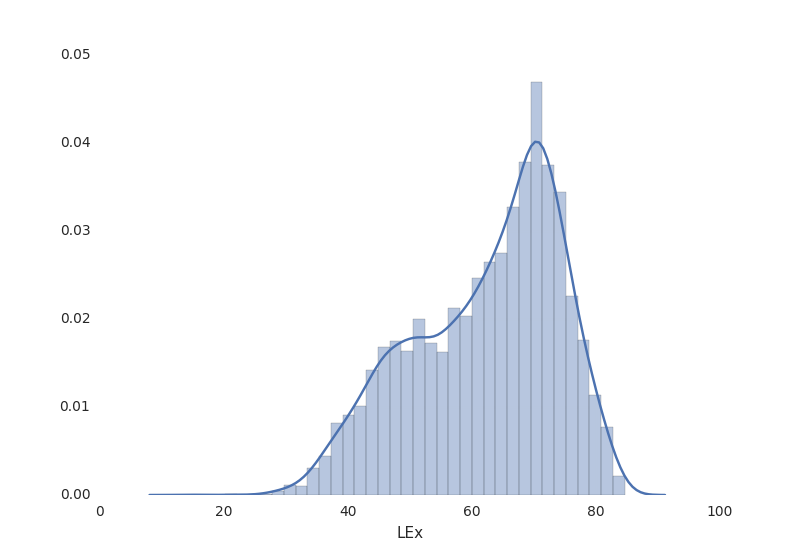

In [15]:
# Graph the LEx
import seaborn as sns
import matplotlib.pyplot as plt
pdf = df.toPandas()
fig, ax = plt.subplots()
sns.distplot(pdf['LEx'])
display(fig)

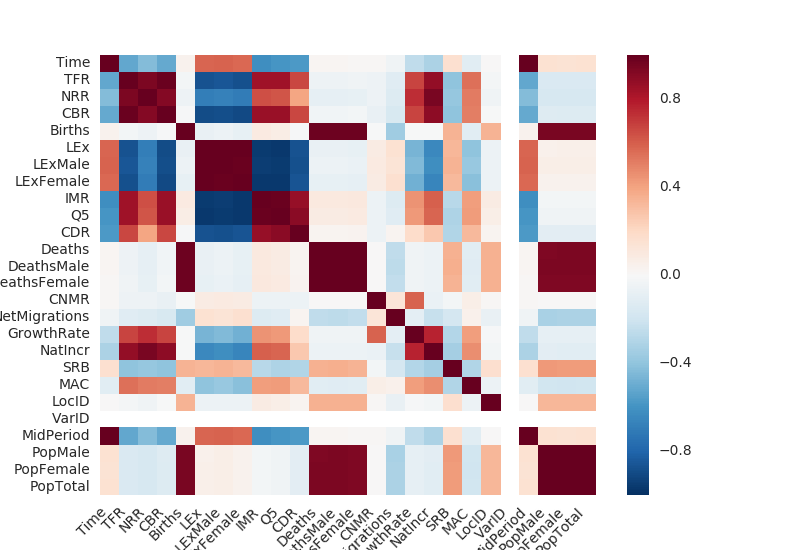

In [16]:
# Run a correlation matrix on the data
# Need to convert to pandas
fig, ax = plt.subplots()
corr = pdf.corr()
ax = sns.heatmap(corr)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
display(fig)

In [17]:
# Drop some columns
# Death by sex are correlated, so should just choose one (Deaths)
# 'LExMale','LExFemale' should not be used to predict LEx
pdf = df.drop('Time').drop('LExMale').drop('LExFemale').drop('DeathsMale').drop('DeathsFemale').drop('PopTotal').drop('LocID').drop('VarID').drop('Location').drop('MidPeriod').drop('Variant')

## Regression

### Split the data for train and test

In [20]:
train_data,test_data = pdf.randomSplit([0.6, 0.4], 24)

### Specify the model & prepare data

In [22]:
# Use RFormula to specify the formula and prepared the training and testing data
from pyspark.ml.feature import RFormula 
columns = pdf.columns
columns.remove('LEx')
formula = "{} ~ {}".format("LEx", " + ".join(columns))
print("Formula : {}".format(formula))
supervised = RFormula(formula = formula)
train_fittedRF = supervised.fit(train_data)
train_preparedDF = train_fittedRF.transform(train_data) 

test_fittedRF = supervised.fit(test_data)
test_preparedDF = test_fittedRF.transform(test_data)

Formula : LEx ~ TFR + NRR + CBR + Births + IMR + Q5 + CDR + Deaths + CNMR + NetMigrations + GrowthRate + NatIncr + SRB + MAC + PopMale + PopFemale

In [23]:
# Display training data
train_data.show(5)

+-----+-----+------+-------+-----+-----+-----+-----+-------+------+-------------+----------+-------+-----+------+---------+---------+
 TFR| NRR| CBR| Births| LEx| IMR| Q5| CDR| Deaths| CNMR|NetMigrations|GrowthRate|NatIncr| SRB| MAC| PopMale|PopFemale|
+-----+-----+------+-------+-----+-----+-----+-----+-------+------+-------------+----------+-------+-----+------+---------+---------+
1.051|0.496| 8.426|966.762|78.19| 5.16|6.518|6.406|734.925| 2.179| 250.002| 0.42| 2.02|1.093|29.557|11604.831|11414.211|
1.116|0.537|11.021| 22.409|79.75|6.403|8.614|3.937| 8.005|13.704| 27.864| 2.081| 7.084| 1.05|29.774| 197.062| 212.558|
 1.15|0.547| 8.425|997.858|80.19|3.713|4.651|7.502|888.561| 1.267| 150.004| 0.219| 0.923|1.077|31.701|11812.166|11914.294|
 1.19|0.577|11.198| 31.924|83.28| 3.06|4.123| 3.65| 10.406|14.856| 42.35| 2.243| 7.548| 1.05|30.084| 277.154| 300.214|
 1.2|0.582|11.028| 34.502|84.04|2.624|3.532|3.917| 12.254| 7.991| 25.0| 1.511| 7.111| 1.05|30.097| 303.321| 328.312|
+-----+-----+------+-------+-----+-----+-----+-----+-------+------+-------------+----------+-------+-----+------+---------+---------+
only showing top 5 rows

### Create the model and apply the model to the data

In [25]:
# Linear regression...
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(labelCol ="label", featuresCol ="features")
train_fittedLR = lr.fit(train_preparedDF)
labeledPredictions = train_fittedLR.transform(test_preparedDF).select("label", "prediction")
labeledPredictions.show(5)

+-----+-----------------+
label| prediction|
+-----+-----------------+
80.97|81.55747192731684|
81.41|80.05493177018252|
82.07|81.17990333163026|
82.43|79.66647733343774|
79.98|79.28762500521604|
+-----+-----------------+
only showing top 5 rows

### Show the predicted results (scatter plot)

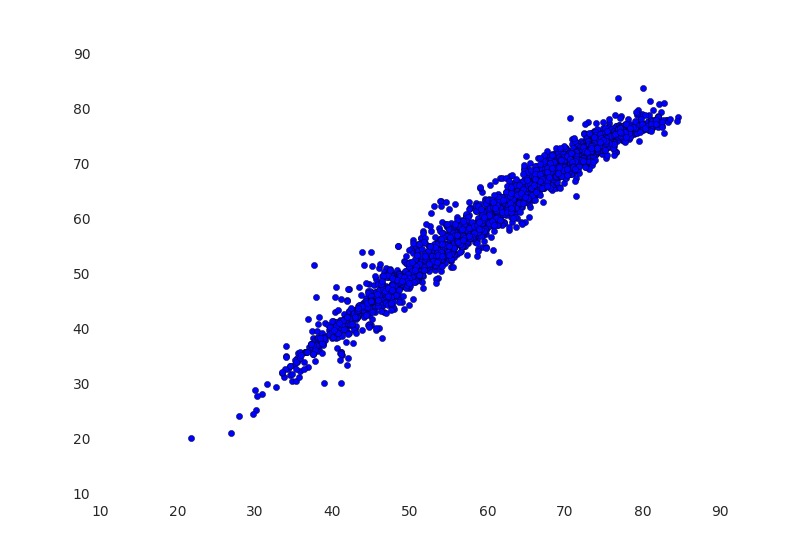

In [27]:
# graph test v predictions
y_test,predictions = zip(*labeledPredictions.collect())
fig, ax = plt.subplots()
plt.scatter(y_test,predictions)
display(fig)

### Get the coefficients

### Evaluate the model

In [30]:
lrModel = train_fittedLR
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

Coefficients: [3.80823413383,-4.08438098236,2.249509136,1.32189567426e-06,-0.0327608258619,-0.0336439745124,-3.69180041284,-2.6013041788e-05,0.718878102621,0.000132187850819,-7.08490650647,-2.23034211854,-1.63409031871,0.234584627503,-4.69702951153e-06,6.27419112596e-06]
Intercept: 83.08663442713811

In [31]:
trainingSummary = lrModel.summary
#trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 2.191168
r2: 0.965046